In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Food Demand Forecasting\Train.csv")
test = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Food Demand Forecasting\Test.csv")
center = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Food Demand Forecasting\Fulfilment Center Info.csv")
meal = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Food Demand Forecasting\Meal Info.csv")

In [3]:
print(train.shape)
train.head()

(456548, 9)


id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
print(test.shape)
test.head()

(32573, 8)


id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [7]:
print(center.shape)
center.head()

(77, 5)


center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [8]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [9]:
print(meal.shape)
meal.head()

(51, 3)


meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [10]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [11]:
train = pd.merge(train,center, on = 'center_id')
test = pd.merge(test,center, on = 'center_id')

train = pd.merge(train,meal, on = 'meal_id')
test = pd.merge(test,meal, on = 'meal_id')

train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [12]:
df = pd.concat([train, test, center, meal], ignore_index = True, axis = 0).reset_index(drop = True)
print(train.shape, test.shape, center.shape, meal.shape, df.shape)

(456548, 14) (32573, 13) (77, 5) (51, 3) (489249, 14)


In [13]:
print(df.shape)
df.head()

(489249, 14)


week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code center_type  op_area   category cuisine  
0         56.0      TYPE_C      2.0  Beverages    Thai  
1         56.0      TYPE_C      2.0  Beverages    Thai  
2         56.0      TYPE_C      2.0  Beverages    Thai  
3         56.0      TYPE_C      2.0  Beverages    Thai  
4         56.0      TYPE_C      2.0  Beverages    Thai

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489249 entries, 0 to 489248
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   489121 non-null  float64
 1   center_id              489198 non-null  float64
 2   meal_id                489172 non-null  float64
 3   checkout_price         489121 non-null  float64
 4   base_price             489121 non-null  float64
 5   emailer_for_promotion  489121 non-null  float64
 6   homepage_featured      489121 non-null  float64
 7   num_orders             456548 non-null  float64
 8   city_code              489198 non-null  float64
 9   region_code            489198 non-null  float64
 10  center_type            489198 non-null  object 
 11  op_area                489198 non-null  float64
 12  category               489172 non-null  object 
 13  cuisine                489172 non-null  object 
dtypes: float64(11), object(3)
memory usa

In [15]:
df.head()

week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code center_type  op_area   category cuisine  
0         56.0      TYPE_C      2.0  Beverages    Thai  
1         56.0      TYPE_C      2.0  Beverages    Thai  
2         56.0      TYPE_C      2.0  Beverages    Thai  
3         56.0      TYPE_C      2.0  Beverages    Thai  
4         56.0      TYPE_C      2.0  Beverages    Thai

In [16]:
df.dropna(how = 'any').shape

(456548, 14)

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(keep = 'first').shape

(489249, 14)

In [19]:
df.drop_duplicates(keep = 'last').shape

(489249, 14)

In [20]:
df.drop_duplicates(keep = False).shape

(489249, 14)

In [21]:
df.dropna(subset = ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 
                    'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 
                    'region_code', 'center_type', 'op_area', 'category', 
                    'cuisine'], how = 'any').shape

(456548, 14)

In [22]:
df.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [23]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'op_area'], object: ['center_type', 'category', 'cuisine']}

In [24]:
df.isnull().sum()

week                       128
center_id                   51
meal_id                     77
checkout_price             128
base_price                 128
emailer_for_promotion      128
homepage_featured          128
num_orders               32701
city_code                   51
region_code                 51
center_type                 51
op_area                     51
category                    77
cuisine                     77
dtype: int64

In [25]:
df["week"].fillna(method ='ffill', inplace = True)
df["center_type"].fillna(method = 'ffill', inplace = True)
df["num_orders"].fillna(method = 'ffill', inplace = True)
df["meal_id"].fillna(method ='ffill', inplace = True)
df["checkout_price"].fillna(method ='ffill', inplace = True)
df["base_price"].fillna(method = 'ffill', inplace = True)
df["city_code"].fillna(method = 'ffill', inplace = True)
df["homepage_featured"].fillna(method = 'ffill', inplace = True)
df["op_area"].fillna(method = 'ffill', inplace = True)
df["region_code"].fillna(method = 'ffill', inplace = True)
df["emailer_for_promotion"].fillna(method ='ffill', inplace = True)
df["center_id"].fillna(method = 'ffill', inplace = True)
df["meal_id"].fillna(method = 'ffill', inplace = True)
df["category"].fillna(method = 'ffill', inplace = True)
df["cuisine"].fillna(method = 'ffill', inplace = True)
df.head()

week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code center_type  op_area   category cuisine  
0         56.0      TYPE_C      2.0  Beverages    Thai  
1         56.0      TYPE_C      2.0  Beverages    Thai  
2         56.0      TYPE_C      2.0  Beverages    Thai  
3         56.0      TYPE_C      2.0  Beverages    Thai  
4         56.0      TYPE_C      2.0  Beverages    Thai

In [26]:
df.nunique()

week                      155
center_id                  77
meal_id                    51
checkout_price           1995
base_price               1931
emailer_for_promotion       2
homepage_featured           2
num_orders               1250
city_code                  51
region_code                 8
center_type                 3
op_area                    30
category                   14
cuisine                     4
dtype: int64

In [27]:
df.notnull().tail()

week  center_id  meal_id  checkout_price  base_price  \
489244  True       True     True            True        True   
489245  True       True     True            True        True   
489246  True       True     True            True        True   
489247  True       True     True            True        True   
489248  True       True     True            True        True   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
489244                   True               True        True       True   
489245                   True               True        True       True   
489246                   True               True        True       True   
489247                   True               True        True       True   
489248                   True               True        True       True   

        region_code  center_type  op_area  category  cuisine  
489244         True         True     True      True     True  
489245         True         True     True      True     True  
489246         True         True     True      True     True  
489247         True         True     True      True     True  
489248         True         True     True      True     True

In [28]:
df.apply(lambda x: x.dtype)

week                     float64
center_id                float64
meal_id                  float64
checkout_price           float64
base_price               float64
emailer_for_promotion    float64
homepage_featured        float64
num_orders               float64
city_code                float64
region_code              float64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [29]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

week                     0.0
center_id                0.0
meal_id                  0.0
checkout_price           0.0
base_price               0.0
emailer_for_promotion    0.0
homepage_featured        0.0
num_orders               0.0
city_code                0.0
region_code              0.0
center_type              0.0
op_area                  0.0
category                 0.0
cuisine                  0.0
dtype: float64

In [30]:
(df.isnull().sum()/len(df))*100

week                     0.0
center_id                0.0
meal_id                  0.0
checkout_price           0.0
base_price               0.0
emailer_for_promotion    0.0
homepage_featured        0.0
num_orders               0.0
city_code                0.0
region_code              0.0
center_type              0.0
op_area                  0.0
category                 0.0
cuisine                  0.0
dtype: float64

In [31]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

Total missing  % missing
week                   0        0.0
center_id              0        0.0
meal_id                0        0.0

In [32]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique()) 

Unique Values for Each Feature: 

week : 155
center_id : 77
meal_id : 51
checkout_price : 1995
base_price : 1931
emailer_for_promotion : 2
homepage_featured : 2
num_orders : 1250
city_code : 51
region_code : 8
center_type : 3
op_area : 30
category : 14
cuisine : 4


In [33]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

center_type
['TYPE_C' 'TYPE_B' 'TYPE_A']
category
['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Salad' 'Fish' 'Soup']
cuisine
['Thai' 'Indian' 'Italian' 'Continental']


In [34]:
numerical_data = df.select_dtypes(include=np.number)
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code  op_area  
0         56.0      2.0  
1         56.0      2.0  
2         56.0      2.0  
3         56.0      2.0  
4         56.0      2.0  


In [35]:
categorical_data = df.select_dtypes(exclude=np.number) 
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
  center_type   category cuisine
0      TYPE_C  Beverages    Thai
1      TYPE_C  Beverages    Thai
2      TYPE_C  Beverages    Thai
3      TYPE_C  Beverages    Thai
4      TYPE_C  Beverages    Thai


In [36]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['center_type', 'category', 'cuisine']

In [37]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  11


In [38]:
#Discrete Numerical Features
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [39]:
#Continuous Numerical Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 8


In [40]:
df.describe()

week      center_id        meal_id  checkout_price  \
count  489249.000000  489249.000000  489249.000000   489249.000000   
mean       79.829500      82.089130    2024.863585      332.957150   
std        44.352893      45.972063     547.366892      153.077763   
min         1.000000      10.000000    1062.000000        2.970000   
25%        42.000000      43.000000    1558.000000      228.010000   
50%        81.000000      76.000000    1993.000000      299.760000   
75%       118.000000     110.000000    2539.000000      445.230000   
max       155.000000     186.000000    2956.000000     1113.620000   

          base_price  emailer_for_promotion  homepage_featured     num_orders  \
count  489249.000000          489249.000000      489249.000000  489249.000000   
mean      354.384786               0.080151           0.107318     246.174059   
std       160.393863               0.271528           0.309517     386.934400   
min        55.350000               0.000000           0.000000      13.000000   
25%       243.500000               0.000000           0.000000      41.000000   
50%       311.430000               0.000000           0.000000     122.000000   
75%       459.780000               0.000000           0.000000     298.000000   
max      1112.620000               1.000000           1.000000   24299.000000   

           city_code    region_code        op_area  
count  489249.000000  489249.000000  489249.000000  
mean      601.554832      56.620980       4.084154  
std        66.180212      17.640436       1.092514  
min       456.000000      23.000000       0.900000  
25%       553.000000      34.000000       3.600000  
50%       596.000000      56.000000       4.000000  
75%       651.000000      77.000000       4.500000  
max       713.000000      93.000000       7.000000

In [41]:
df.corr()

week  center_id   meal_id  checkout_price  \
week                   1.000000  -0.003600  0.018859        0.030754   
center_id             -0.003600   1.000000  0.009811        0.000954   
meal_id                0.018859   0.009811  1.000000        0.013013   
checkout_price         0.030754   0.000954  0.013013        1.000000   
base_price             0.027278   0.000086  0.004484        0.954226   
emailer_for_promotion -0.006727   0.013345  0.010562        0.005772   
homepage_featured     -0.017114  -0.005038  0.015418       -0.057135   
num_orders            -0.080016  -0.050437  0.009575       -0.271782   
city_code              0.000377   0.060992 -0.003291       -0.004579   
region_code            0.004596  -0.003761 -0.002232       -0.002792   
op_area                0.002188  -0.111807 -0.001761        0.023287   

                       base_price  emailer_for_promotion  homepage_featured  \
week                     0.027278              -0.006727          -0.017114   
center_id                0.000086               0.013345          -0.005038   
meal_id                  0.004484               0.010562           0.015418   
checkout_price           0.954226               0.005772          -0.057135   
base_price               1.000000               0.171404           0.056073   
emailer_for_promotion    0.171404               1.000000           0.394494   
homepage_featured        0.056073               0.394494           1.000000   
num_orders              -0.213498               0.268221           0.286791   
city_code               -0.001828              -0.005140           0.008115   
region_code             -0.000980              -0.007174           0.002761   
op_area                  0.019651              -0.019621           0.040549   

                       num_orders  city_code  region_code   op_area  
week                    -0.080016   0.000377     0.004596  0.002188  
center_id               -0.050437   0.060992    -0.003761 -0.111807  
meal_id                  0.009575  -0.003291    -0.002232 -0.001761  
checkout_price          -0.271782  -0.004579    -0.002792  0.023287  
base_price              -0.213498  -0.001828    -0.000980  0.019651  
emailer_for_promotion    0.268221  -0.005140    -0.007174 -0.019621  
homepage_featured        0.286791   0.008115     0.002761  0.040549  
num_orders               1.000000   0.039715     0.028196  0.168563  
city_code                0.039715   1.000000     0.042785  0.131655  
region_code              0.028196   0.042785     1.000000  0.023197  
op_area                  0.168563   0.131655     0.023197  1.000000

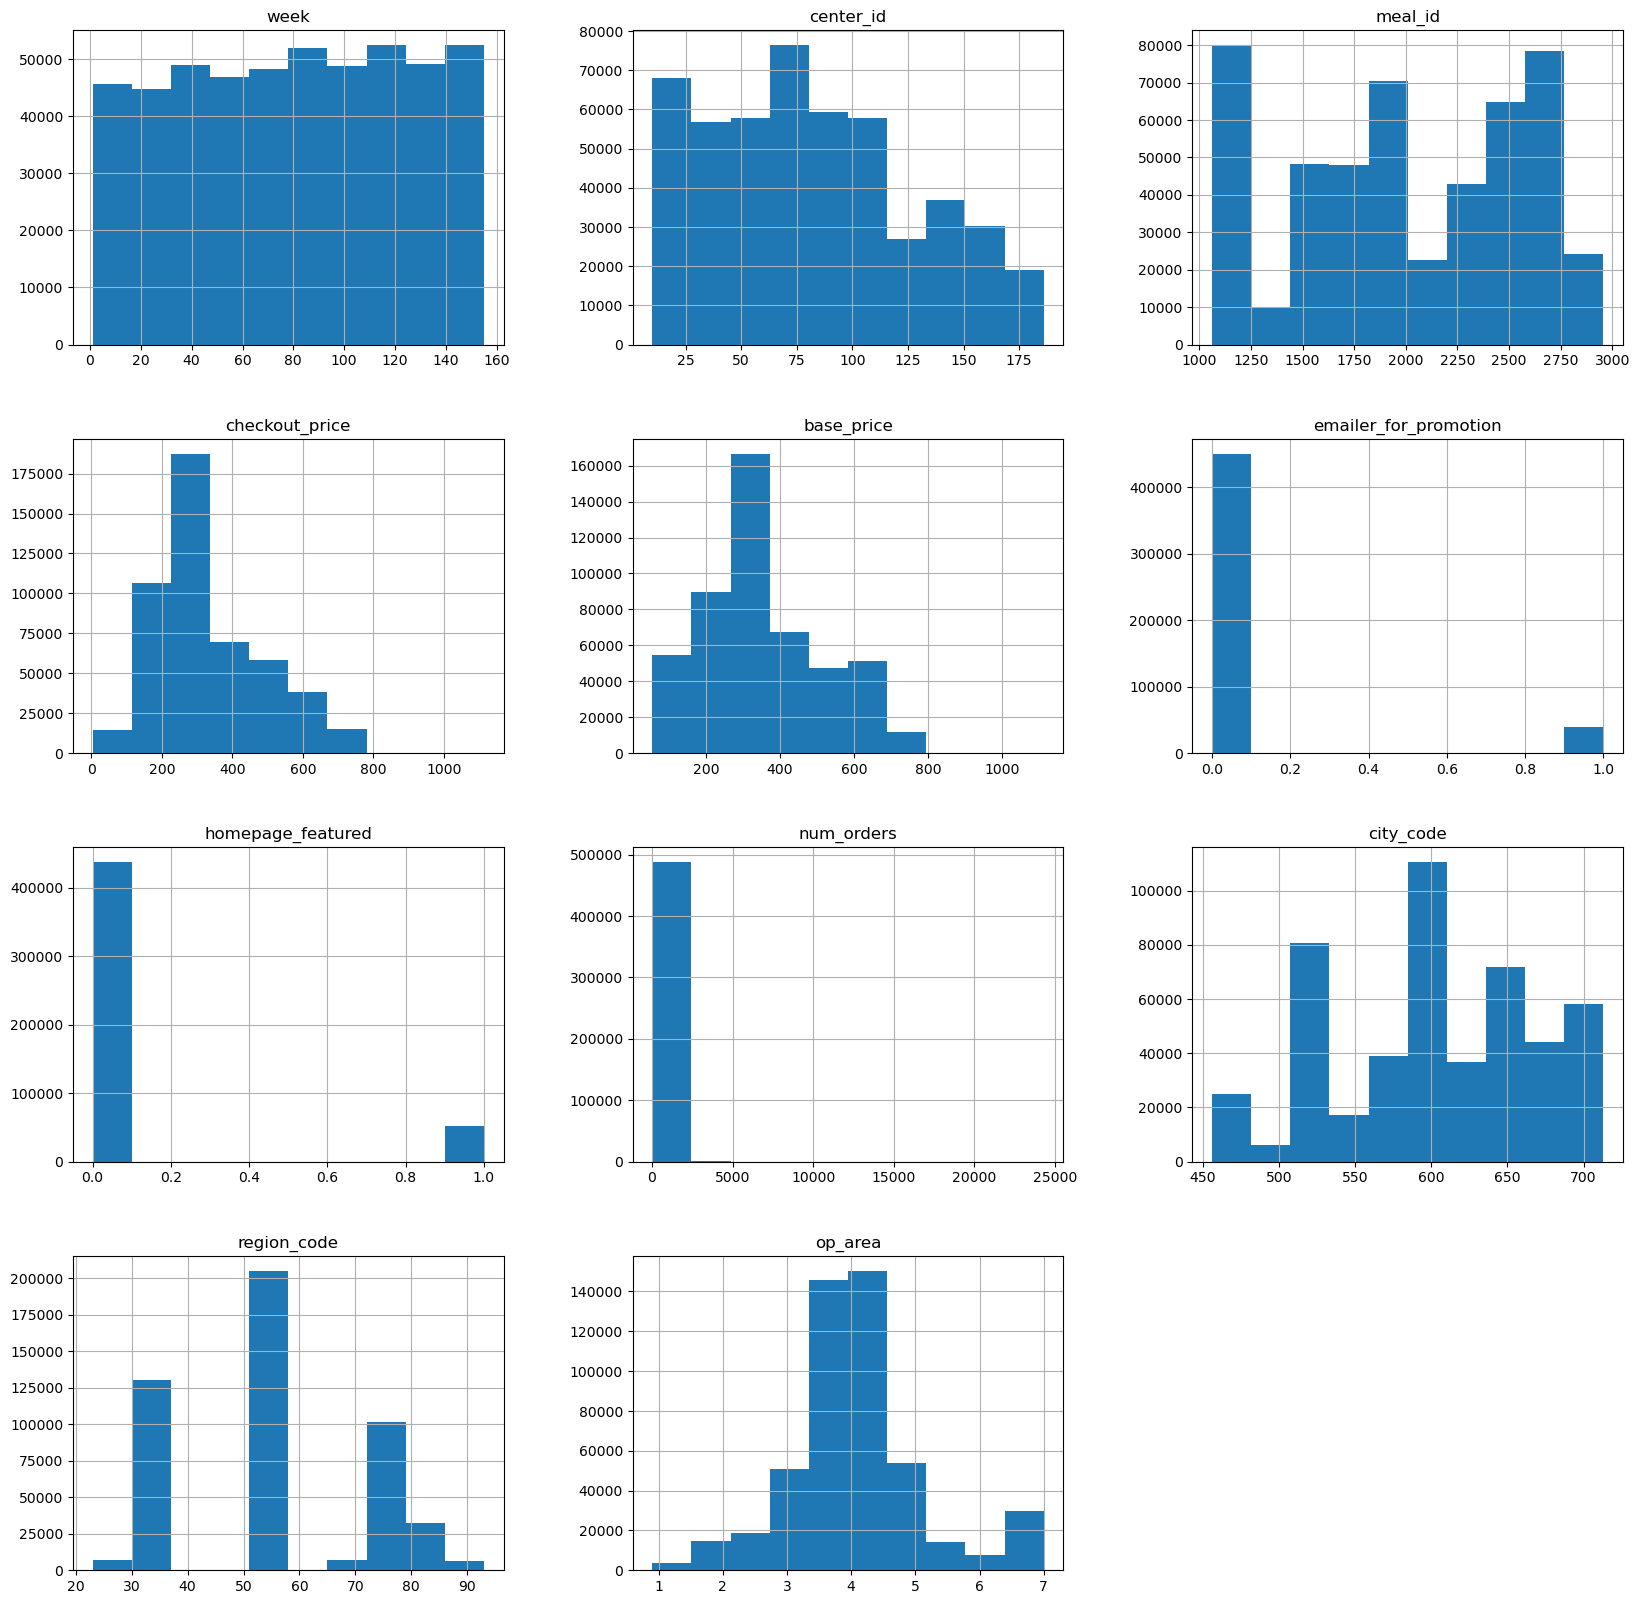

In [42]:
df.hist(figsize=(20,20))
plt.show()

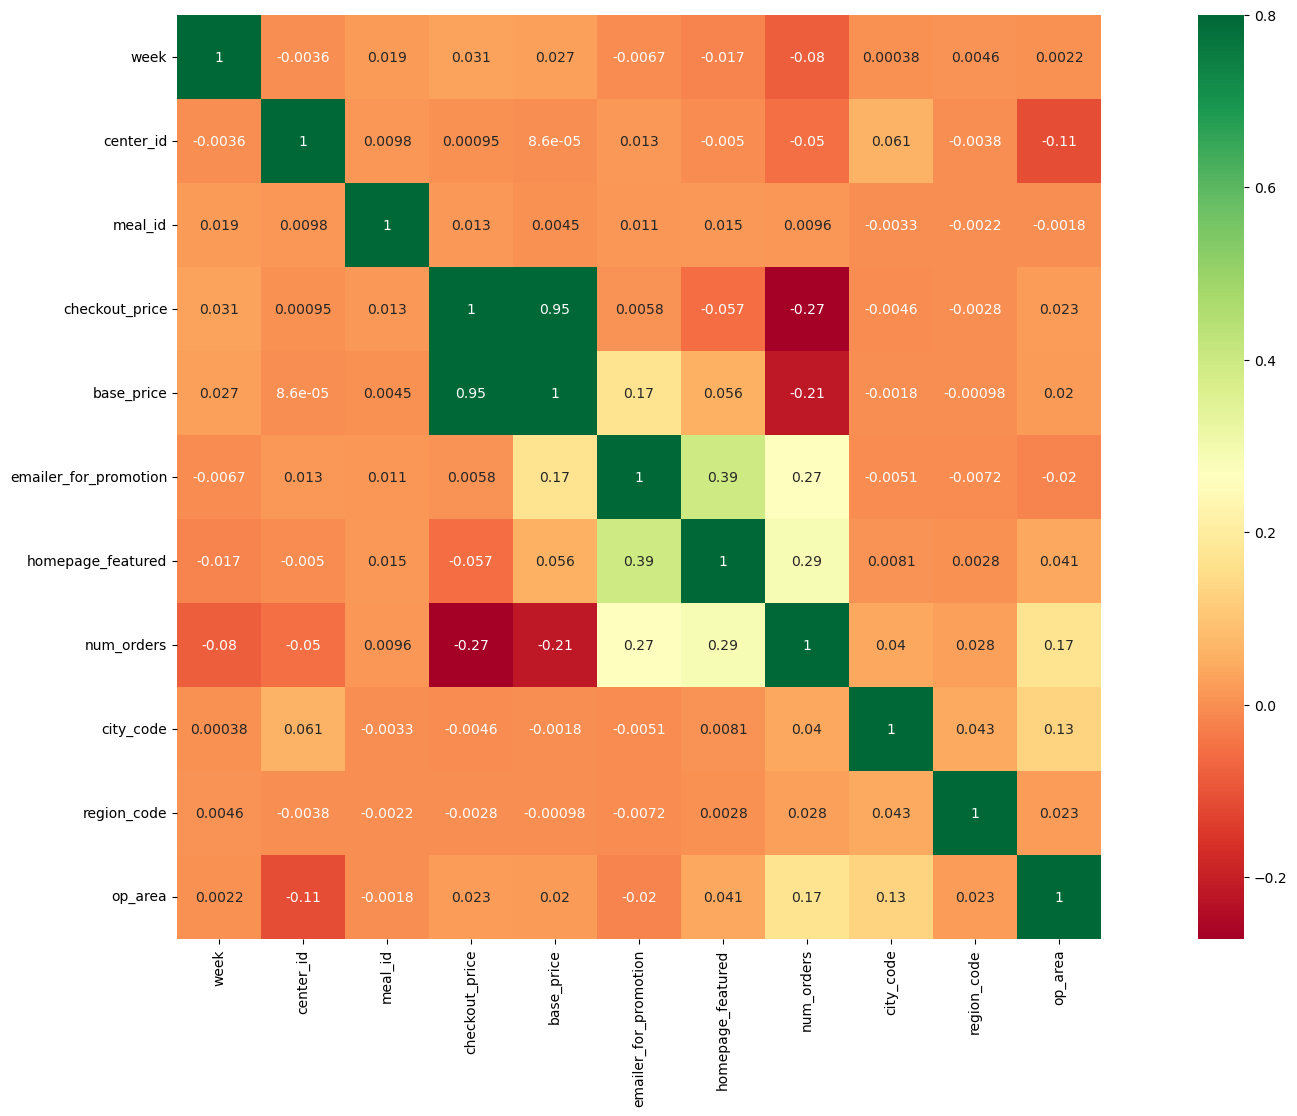

In [43]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

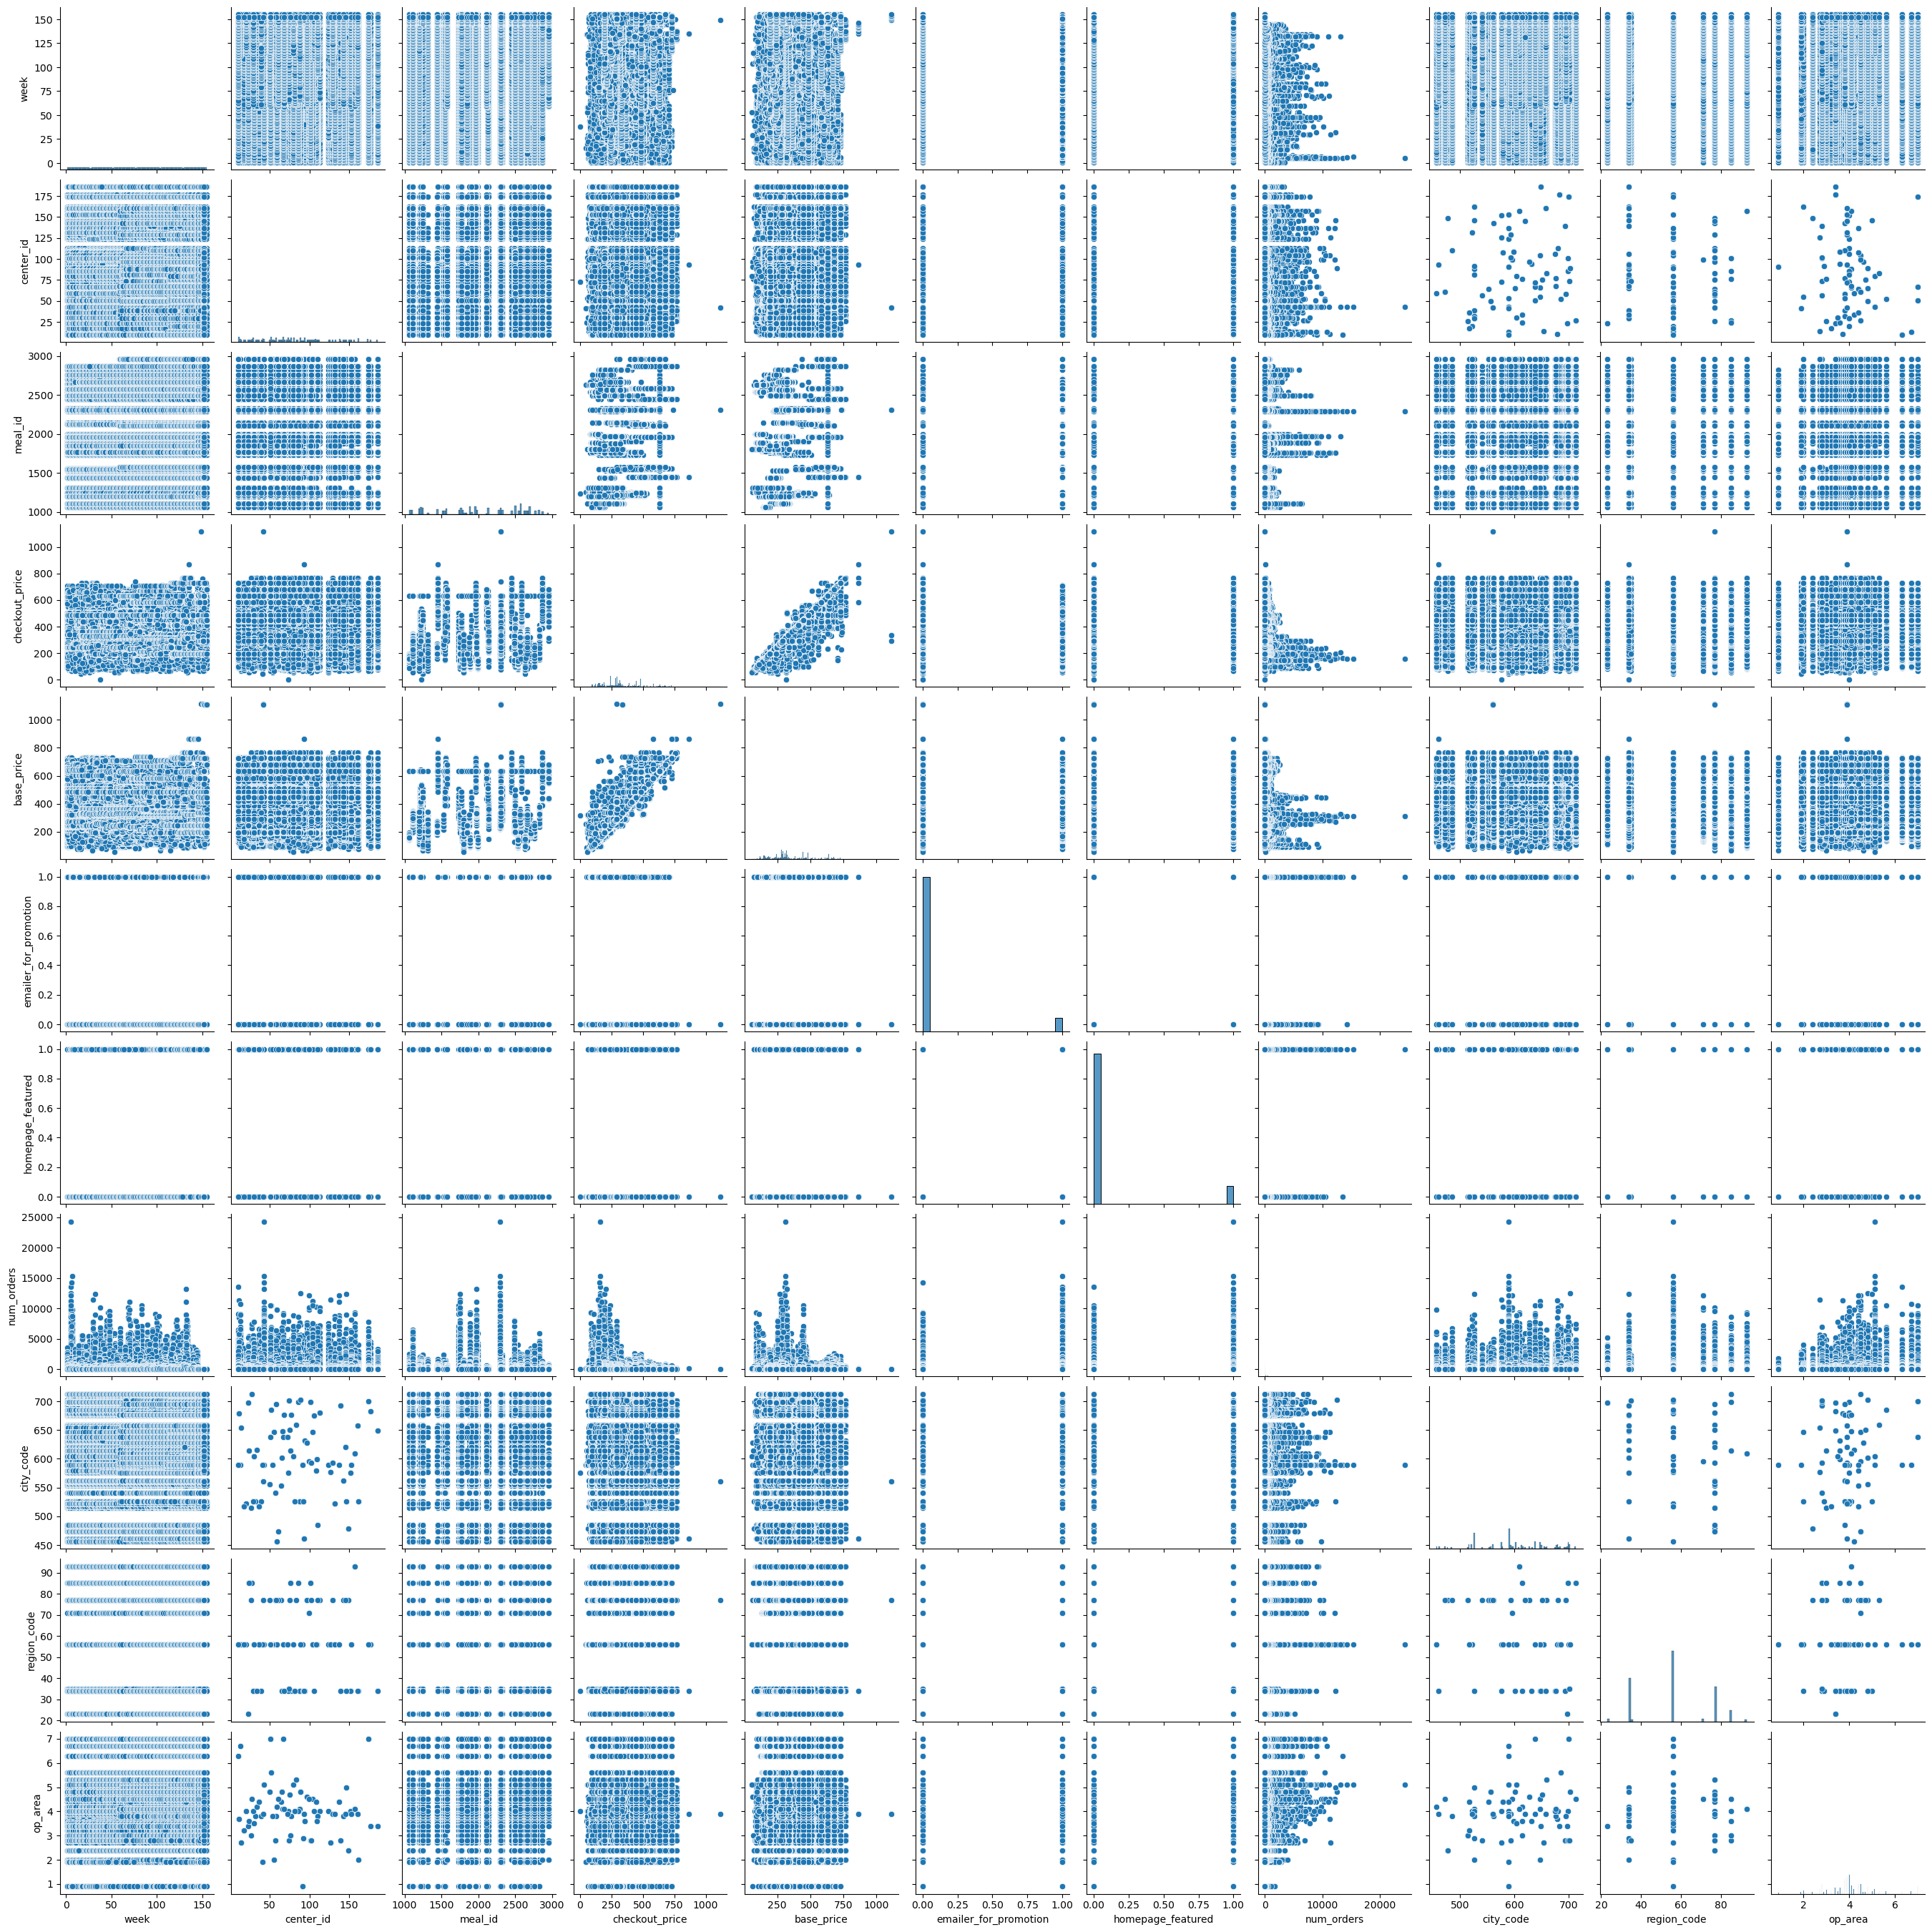

In [44]:
sns.pairplot(df)

In [45]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,
            color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

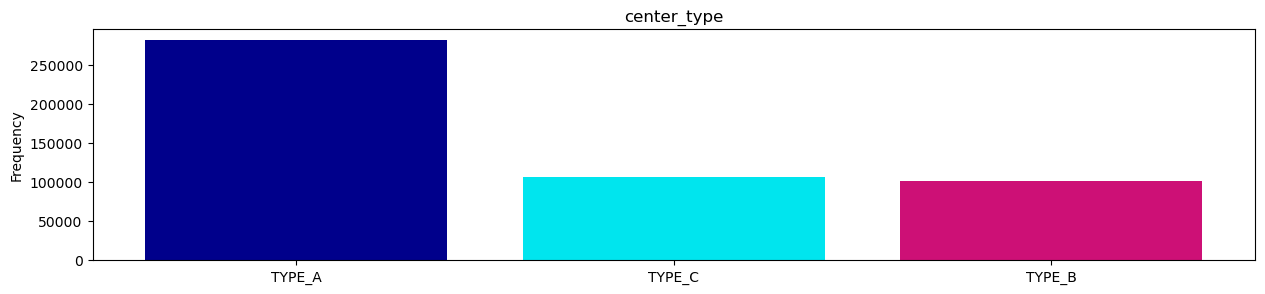

center_type: 
 TYPE_A    281691
TYPE_C    106621
TYPE_B    100937
Name: center_type, dtype: int64


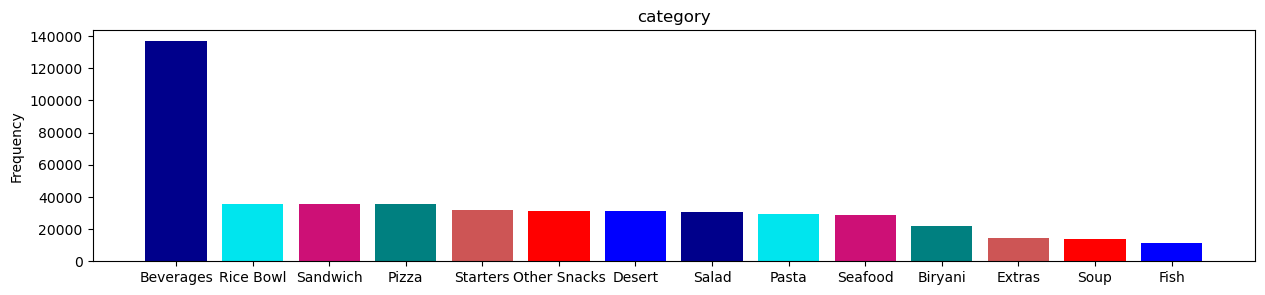

category: 
 Beverages       136793
Rice Bowl        35720
Sandwich         35602
Pizza            35447
Starters         31928
Other Snacks     31486
Desert           31410
Salad            30871
Pasta            29624
Seafood          28616
Biryani          21954
Extras           14557
Soup             13643
Fish             11598
Name: category, dtype: int64


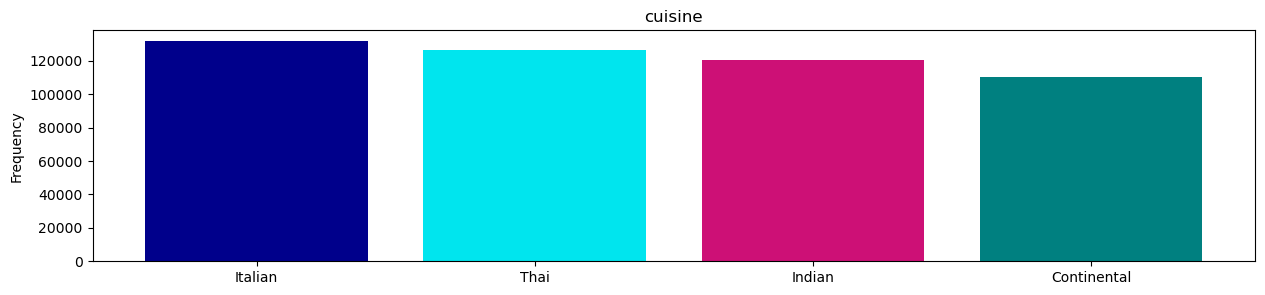

cuisine: 
 Italian        131773
Thai           126573
Indian         120431
Continental    110472
Name: cuisine, dtype: int64


In [46]:
categorical_cols = ['center_type', 'category', 'cuisine']
for c in categorical_cols:
    bar_plot(c)

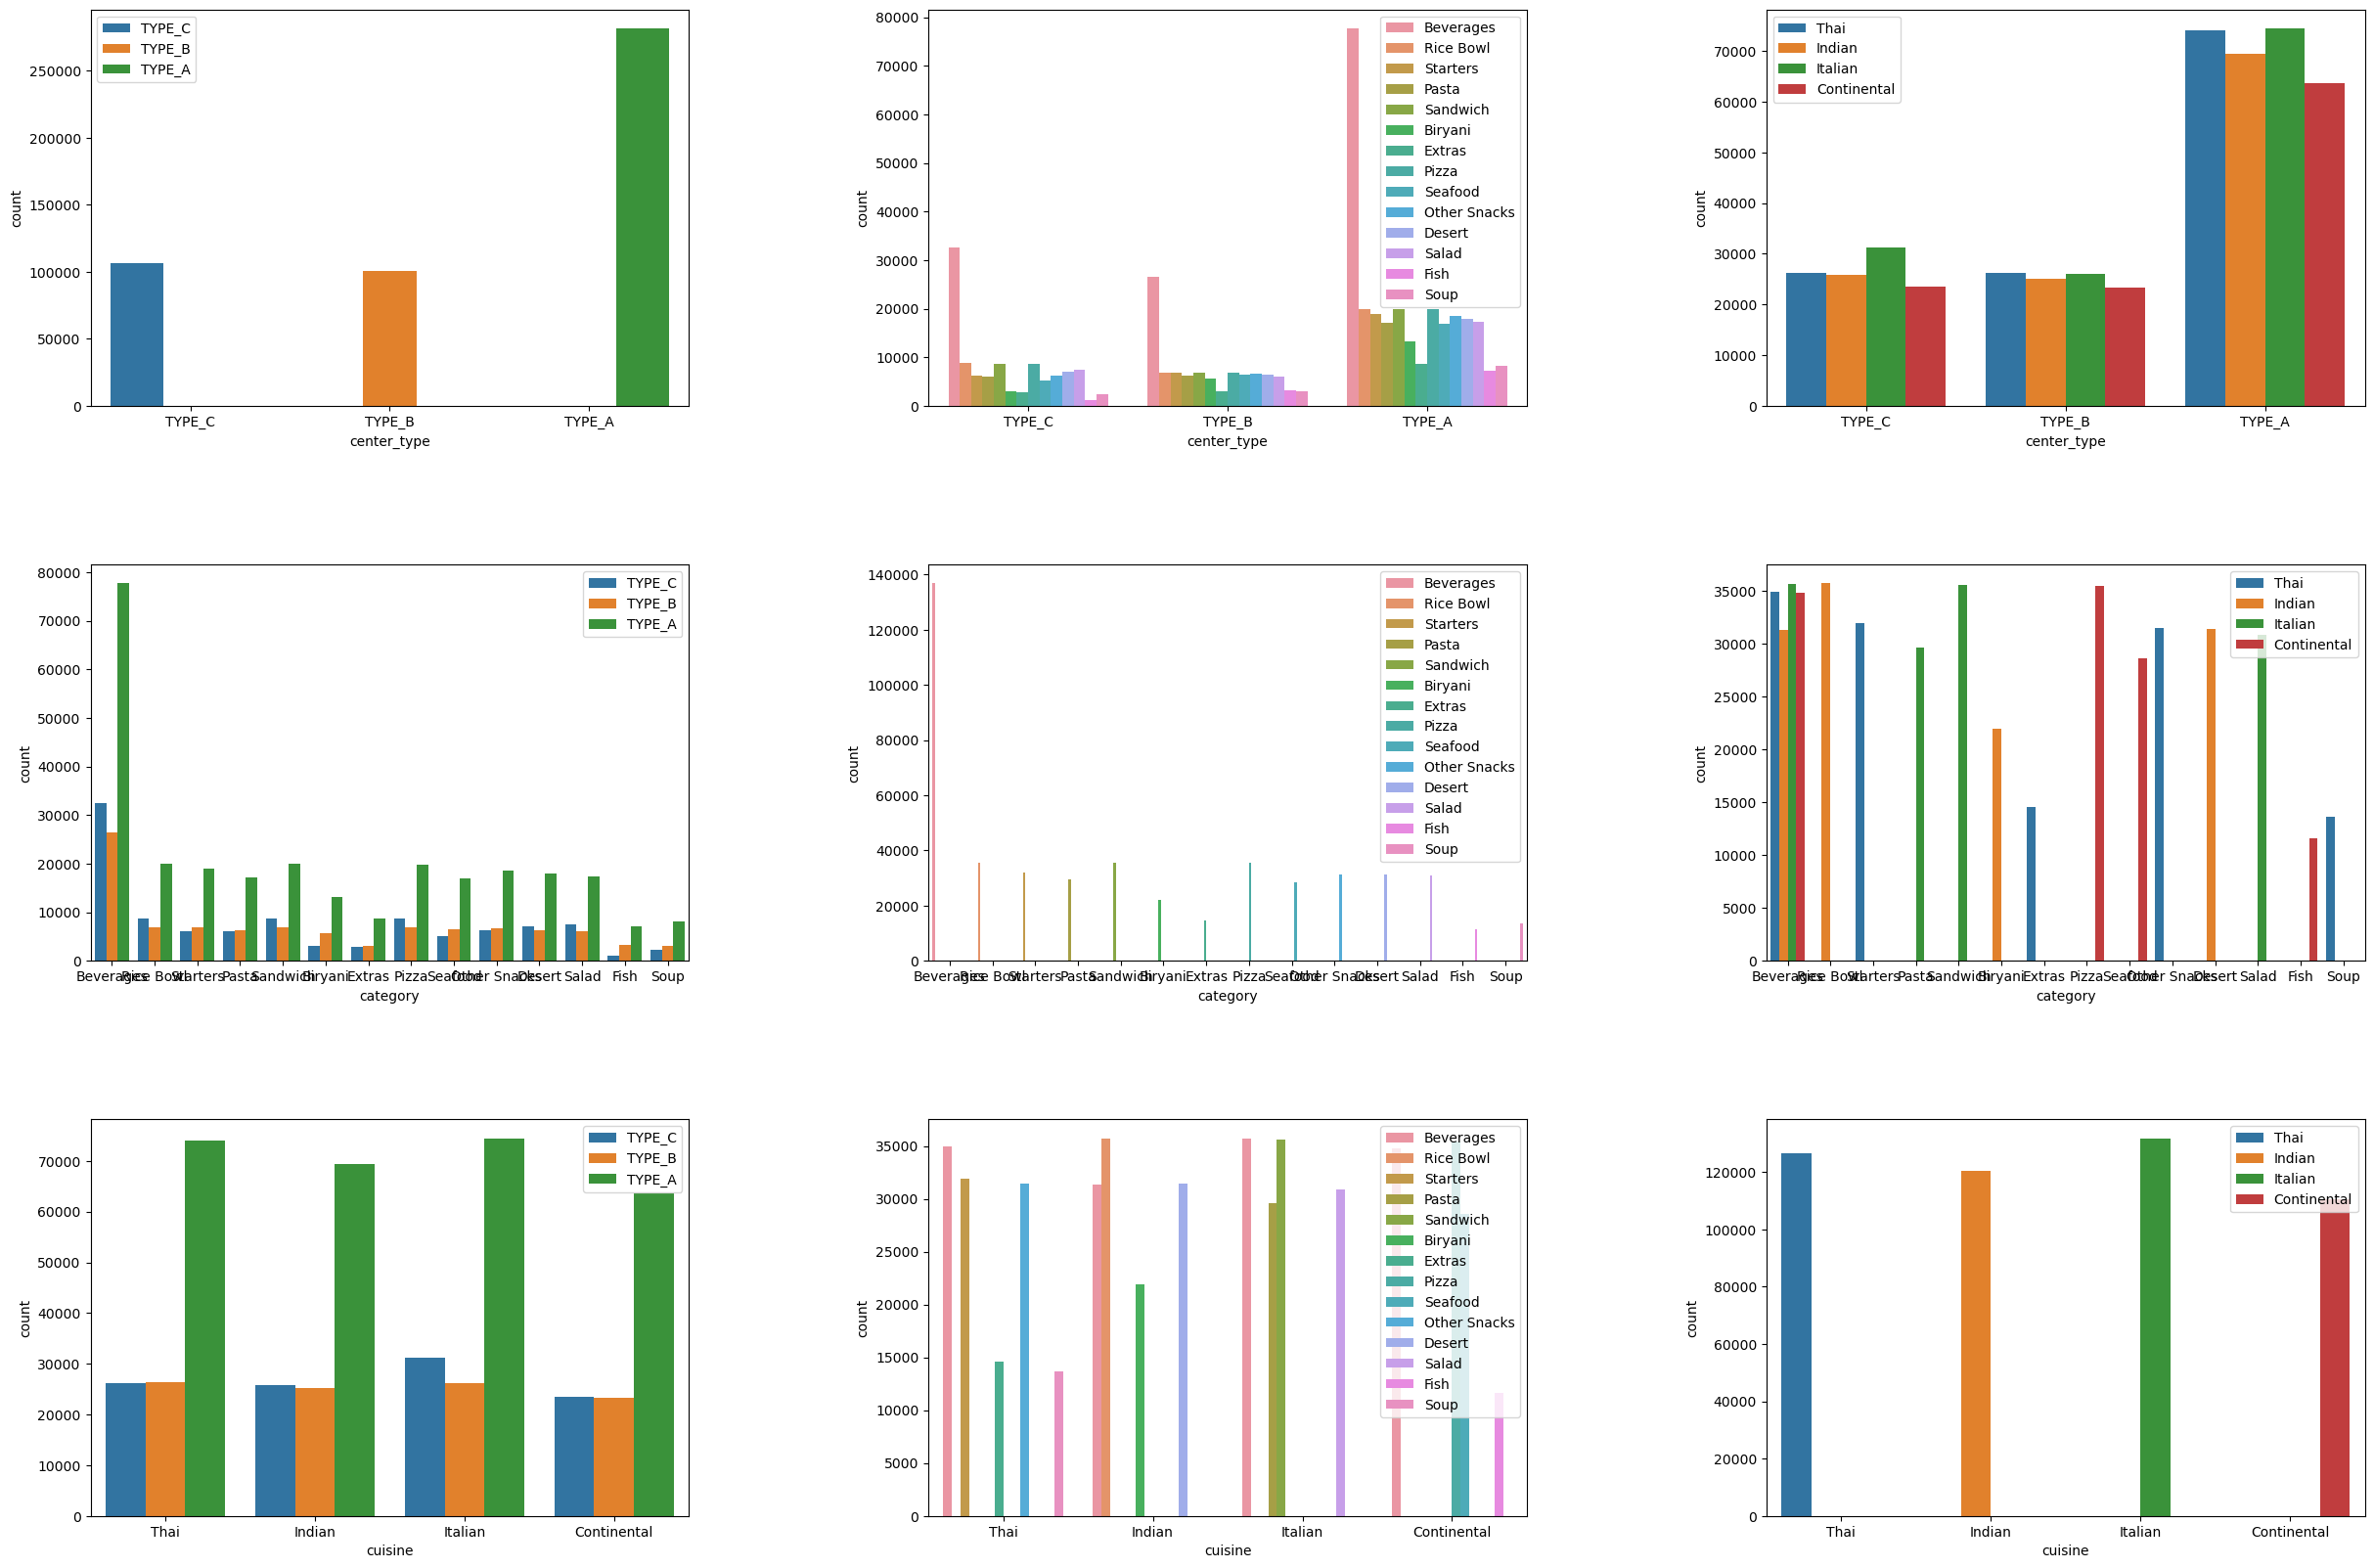

In [47]:
columns = ['center_type', 'category', 'cuisine']
fig = plt.figure(figsize = (30, 20))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, (len(columns)**2)+1):
    ax = fig.add_subplot(len(columns), len(columns), i)
    ax = sns.countplot(df[columns[int((i-1)/len(columns))]],hue = columns[((i-1)%len(columns))],
                       data = df)
    ax = plt.legend(loc = 'best')

plt.show()

In [48]:
cat_col = ['center_type', 'category', 'cuisine']
num_col = ['week', 'checkout_price', 'base_price', 'emailer_for_promotion', 
           'homepage_featured', 'num_orders', 'city_code', 'region_code', 
           'op_area', 'center_id', 'meal_id']

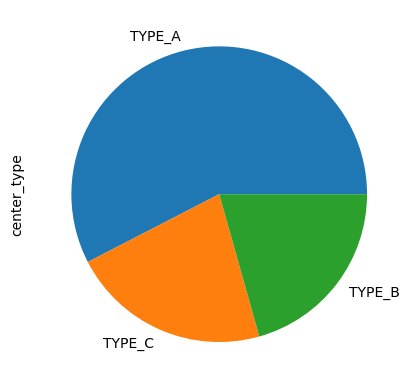

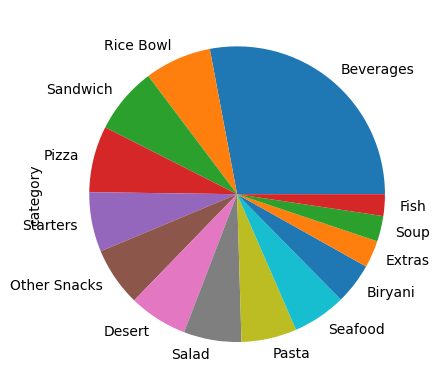

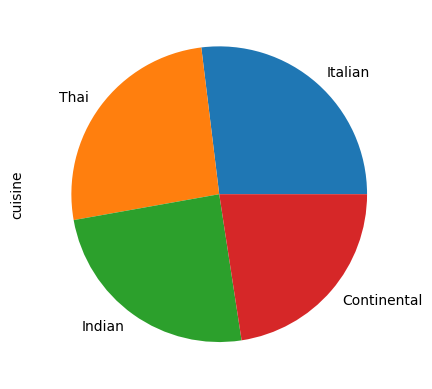

In [49]:
for col in cat_col : 
    plt.figure()
    df[col].value_counts().plot.pie()

In [50]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ center_type  value counts---------------------
TYPE_A    281691
TYPE_C    106621
TYPE_B    100937
Name: center_type, dtype: int64
------------ category  value counts---------------------
Beverages       136793
Rice Bowl        35720
Sandwich         35602
Pizza            35447
Starters         31928
Other Snacks     31486
Desert           31410
Salad            30871
Pasta            29624
Seafood          28616
Biryani          21954
Extras           14557
Soup             13643
Fish             11598
Name: category, dtype: int64
------------ cuisine  value counts---------------------
Italian        131773
Thai           126573
Indian         120431
Continental    110472
Name: cuisine, dtype: int64


------------Number of categories in each columns---------------------
There are 3 categories in center_type
There are 14 categories in category
There are 4 categories in cuisine


# Univariate Analysis

In [51]:
df['center_type'].value_counts()

TYPE_A    281691
TYPE_C    106621
TYPE_B    100937
Name: center_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='center_type'>

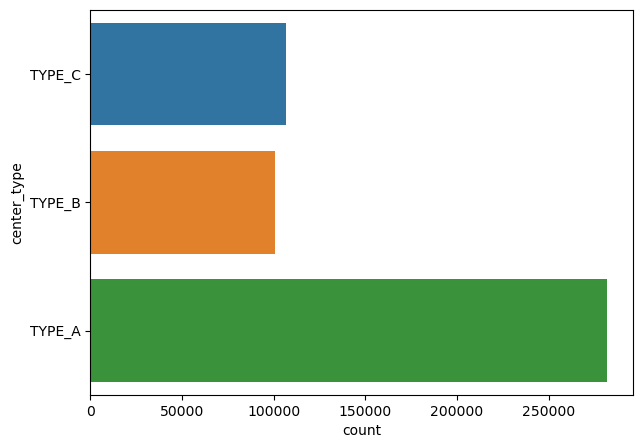

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['center_type'])

<AxesSubplot:ylabel='center_type'>

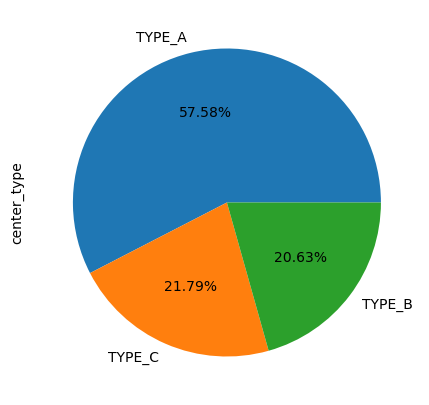

In [53]:
plt.figure(figsize=(7,5))
df['center_type'].value_counts().plot.pie(autopct="%0.2f%%")

In [54]:
df['category'].value_counts()

Beverages       136793
Rice Bowl        35720
Sandwich         35602
Pizza            35447
Starters         31928
Other Snacks     31486
Desert           31410
Salad            30871
Pasta            29624
Seafood          28616
Biryani          21954
Extras           14557
Soup             13643
Fish             11598
Name: category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='category'>

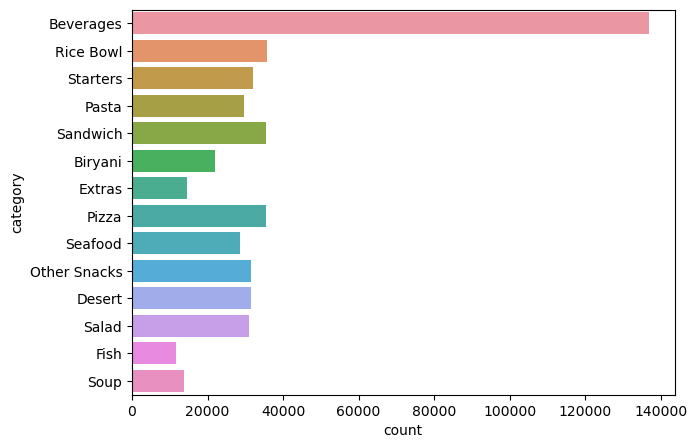

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['category'])

<AxesSubplot:ylabel='category'>

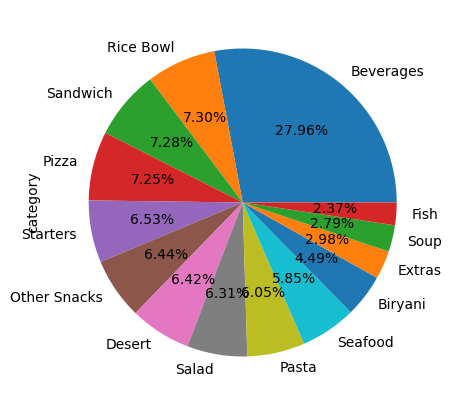

In [56]:
plt.figure(figsize=(7,5))
df['category'].value_counts().plot.pie(autopct="%0.2f%%")

In [57]:
df['cuisine'].value_counts()

Italian        131773
Thai           126573
Indian         120431
Continental    110472
Name: cuisine, dtype: int64

<AxesSubplot:xlabel='count', ylabel='cuisine'>

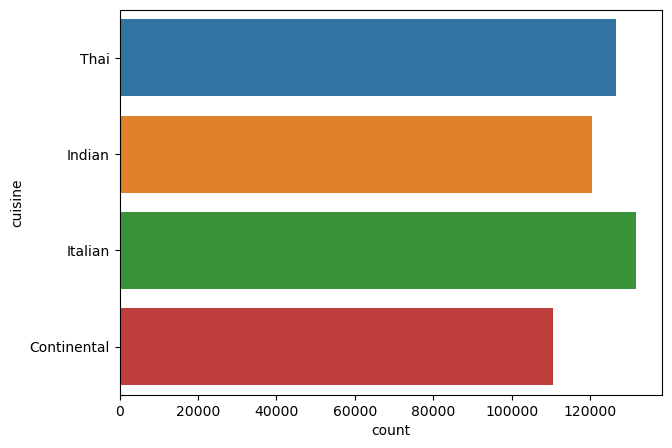

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['cuisine'])

<AxesSubplot:ylabel='cuisine'>

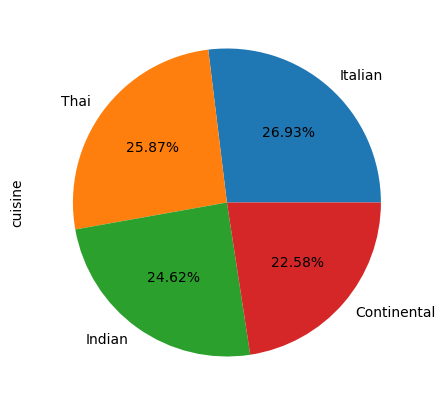

In [59]:
plt.figure(figsize=(7,5))
df['cuisine'].value_counts().plot.pie(autopct="%0.2f%%")

In [60]:
# derving new metric called month,year,Quarter from the week
df['Month'] = df['week'].apply(lambda x: int(x / 4)+1)
df['Year'] = df['week'].apply(lambda x: int(x / 52)+1)
df['Quarter'] = df['week'].apply(lambda x: int(x / 13)+1)

In [61]:
# deriving new metrics ration based on checkout price and base price
df.loc[df['checkout_price'] < df['base_price'], 'C'] = 1
df.loc[df['checkout_price'] > df['base_price'], 'C'] = 2
df.loc[df['checkout_price'] == df['base_price'], 'C'] = 0
df['ratio']=df['checkout_price']/df['base_price']
df['ratio'] = df['ratio'].apply(lambda x: 1 if(x<0.5) else x)

In [62]:
# deriving new metrics called category based on checkout price
df.loc[df['checkout_price'] <= 100, 'Category_check'] = 0
df.loc[(df['checkout_price'] > 100) & (df['checkout_price'] <= 150), 'Category_check'] = 1
df.loc[(df['checkout_price'] > 150) & (df['checkout_price'] <= 200), 'Category_check'] = 2
df.loc[(df['checkout_price'] > 200) & (df['checkout_price'] <= 300), 'Category_check'] = 3
df.loc[(df['checkout_price'] > 300) & (df['checkout_price'] <= 500), 'Category_check'] = 4
df.loc[(df['checkout_price'] > 500) , 'Category_check'] = 5

In [63]:
# deriving new metrics called category based on base price
df.loc[df['base_price'] <= 200, 'Category_base'] = 0
df.loc[(df['base_price'] > 200) & (df['base_price'] <= 400), 'Category_base'] = 1
df.loc[(df['base_price'] > 400) & (df['base_price'] <= 500), 'Category_base'] = 2
df.loc[(df['base_price'] > 500) , 'Category_base'] = 3

In [64]:
df.head()

week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code  ... op_area   category cuisine Month  Year  Quarter    C  \
0         56.0  ...     2.0  Beverages    Thai     1     1        1  1.0   
1         56.0  ...     2.0  Beverages    Thai     1     1        1  1.0   
2         56.0  ...     2.0  Beverages    Thai     1     1        1  1.0   
3         56.0  ...     2.0  Beverages    Thai     2     1        1  2.0   
4         56.0  ...     2.0  Beverages    Thai     2     1        1  1.0   

      ratio  Category_check  Category_base  
0  0.898483             1.0            0.0  
1  0.891917             1.0            0.0  
2  0.992533             1.0            0.0  
3  1.007415             1.0            0.0  
4  0.993220             1.0            0.0  

[5 rows x 21 columns]

# Tree Map

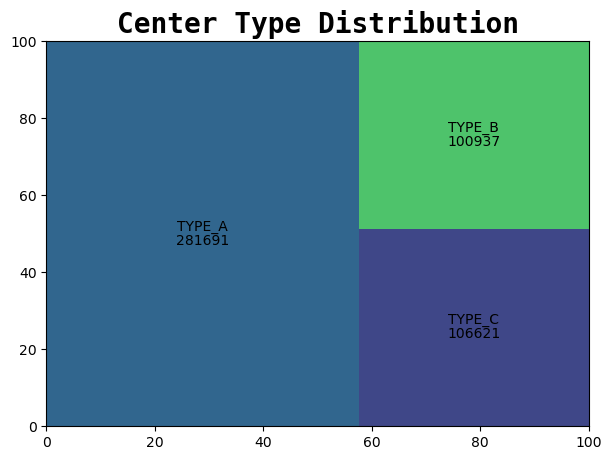

In [65]:
center_type = df['center_type'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = center_type.values, label = center_type.index, value = center_type.values)
plt.title('Center Type Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

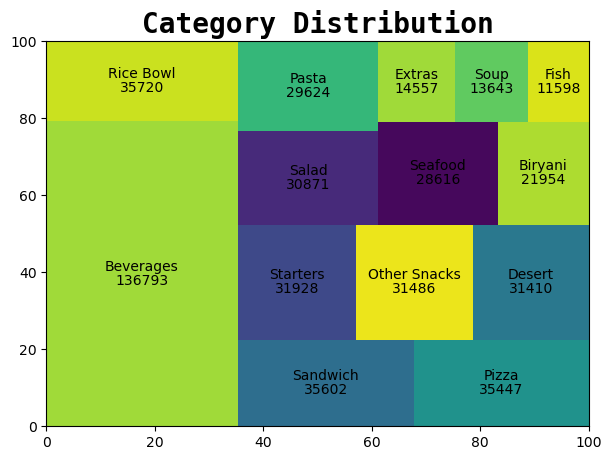

In [66]:
category = df['category'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = category.values, label = category.index, value = category.values)
plt.title('Category Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

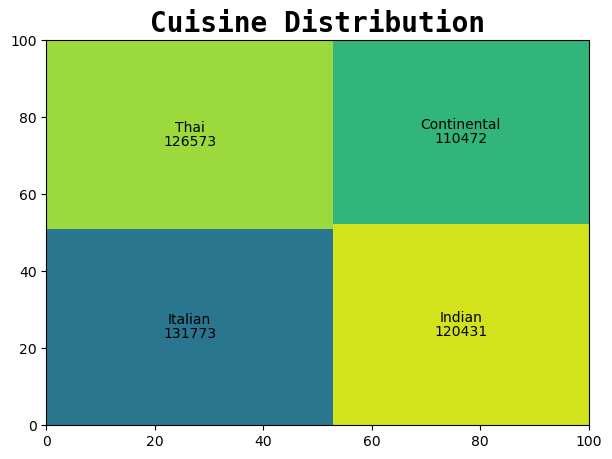

In [67]:
cuisine = df['cuisine'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = cuisine.values, label = cuisine.index, value = cuisine.values)
plt.title('Cuisine Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

# Area Plot

<Figure size 700x500 with 0 Axes>

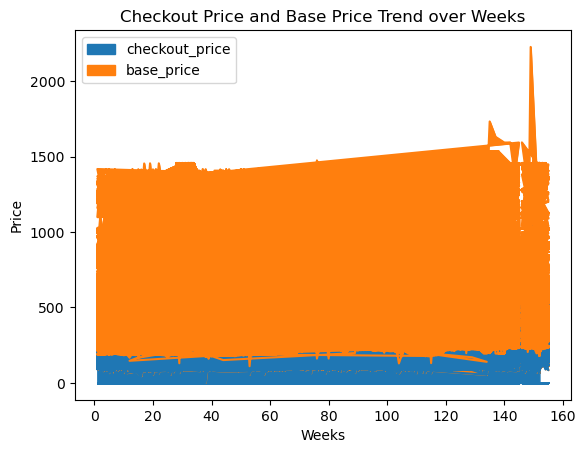

In [68]:
# Visualizing the trend of checkout price and base price over weeks
plt.figure(figsize = (7, 5))
df[['week', 'checkout_price', 'base_price']].plot(x = 'week', kind = 'area')
plt.title('Checkout Price and Base Price Trend over Weeks')
plt.xlabel('Weeks')
plt.ylabel('Price')
plt.show()

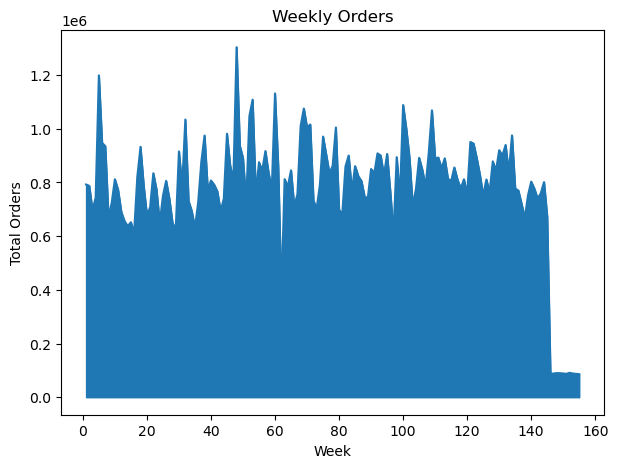

In [69]:
# Weekly Orders
plt.figure(figsize=(7, 5))
df.groupby('week')['num_orders'].sum().plot(kind='area')
plt.title('Weekly Orders')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.show()

# Bar Plot

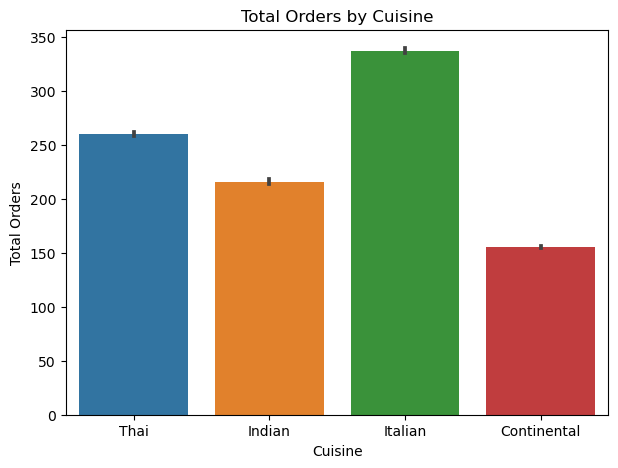

In [70]:
# Orders by Cuisine
plt.figure(figsize=(7, 5))
sns.barplot(x = 'cuisine', y = 'num_orders', data = df)
plt.title('Total Orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.show()

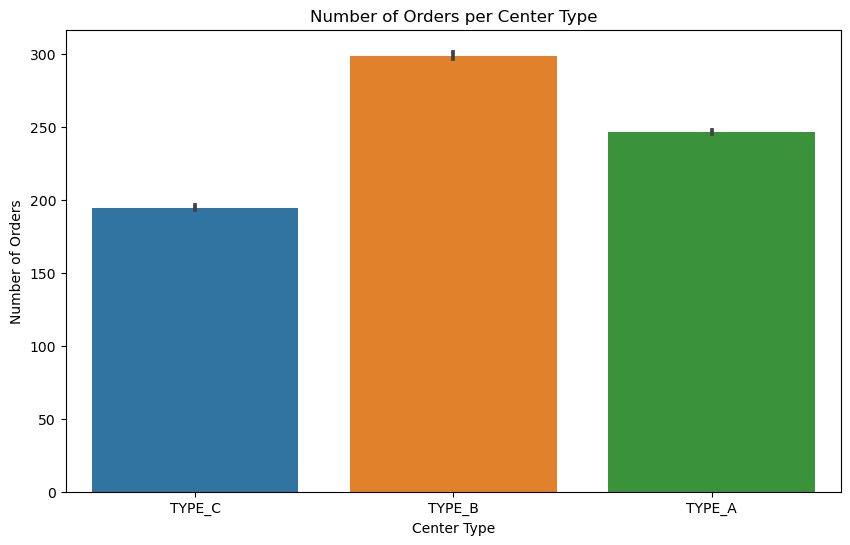

In [71]:
# Showing the number of orders per center type
plt.figure(figsize = (10, 6))
sns.barplot(x = 'center_type', y = 'num_orders', data = df)
plt.title('Number of Orders per Center Type')
plt.xlabel('Center Type')
plt.ylabel('Number of Orders')
plt.show()

# Box Plots

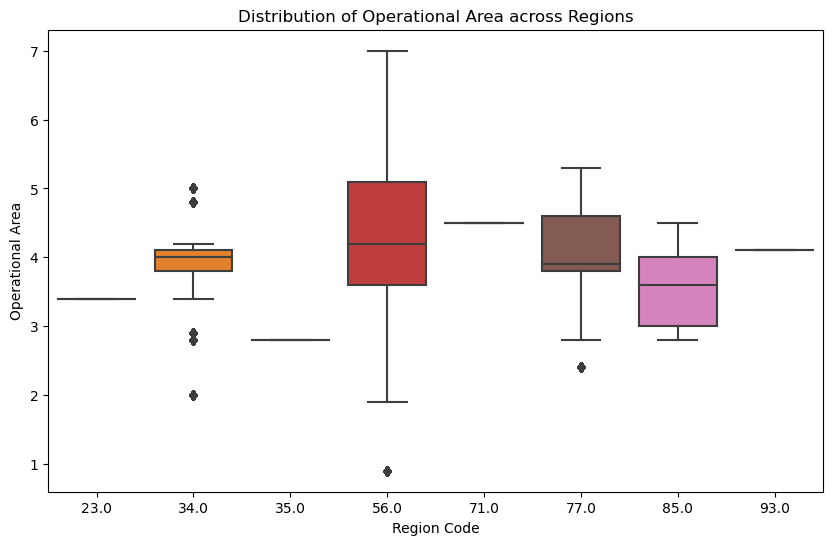

In [72]:
# Analyzing the distribution of op_area across different regions
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'region_code', y = 'op_area', data = df)
plt.title('Distribution of Operational Area across Regions')
plt.xlabel('Region Code')
plt.ylabel('Operational Area')
plt.show()

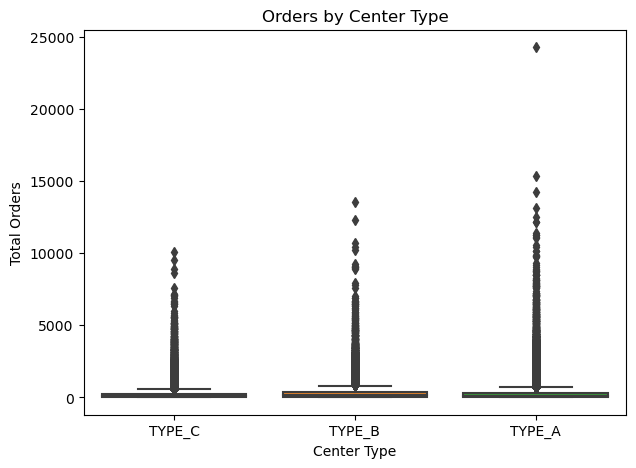

In [73]:
# Orders by Center Type
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'center_type', y = 'num_orders', data = df)
plt.title('Orders by Center Type')
plt.xlabel('Center Type')
plt.ylabel('Total Orders')
plt.show()

# Line Plot

<Figure size 1000x600 with 0 Axes>

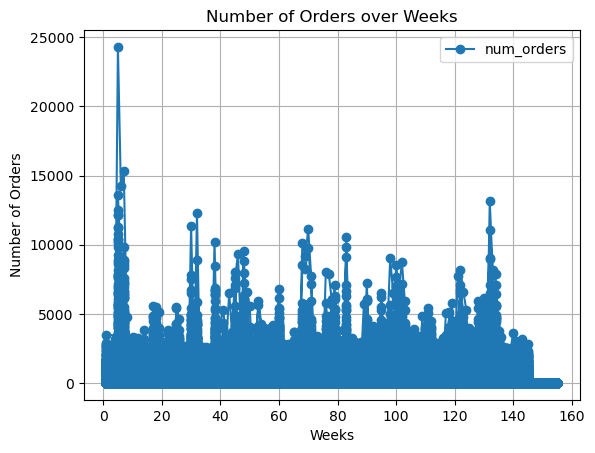

In [74]:
# Visualizing the trend of num_orders over weeks
plt.figure(figsize=(10, 6))
df[['week', 'num_orders']].plot(x='week', marker='o')
plt.title('Number of Orders over Weeks')
plt.xlabel('Weeks')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

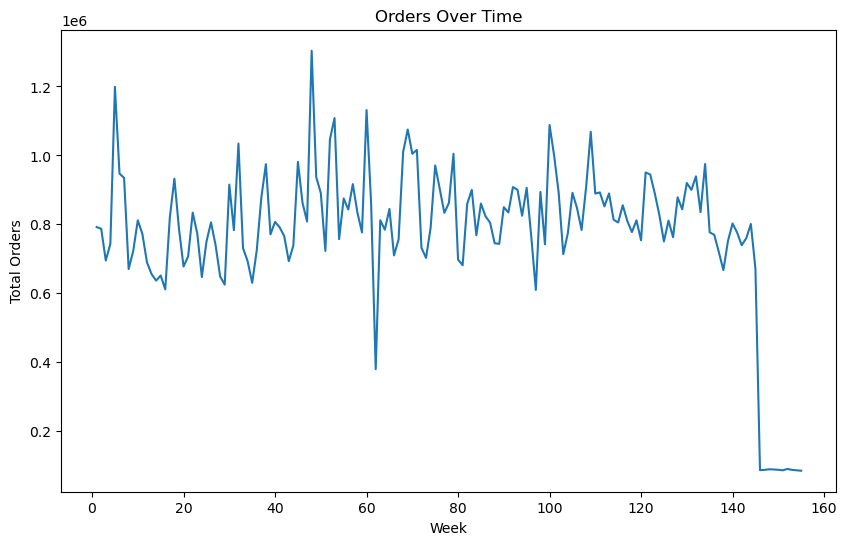

In [75]:
# Orders Over Time
plt.figure(figsize=(10, 6))
df.groupby('week')['num_orders'].sum().plot()
plt.title('Orders Over Time')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.show()

<AxesSubplot:xlabel='week', ylabel='num_orders'>

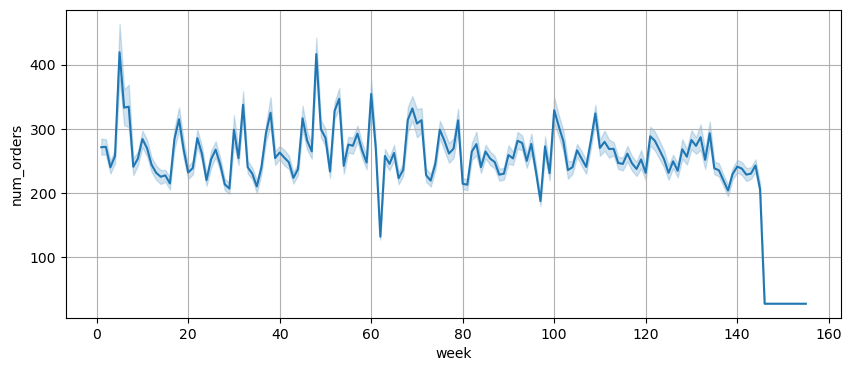

In [76]:
plt.figure(figsize=(10,4))
plt.grid(True)
sns.lineplot(df["week"],df["num_orders"],palette="Set1")

<AxesSubplot:xlabel='Month', ylabel='num_orders'>

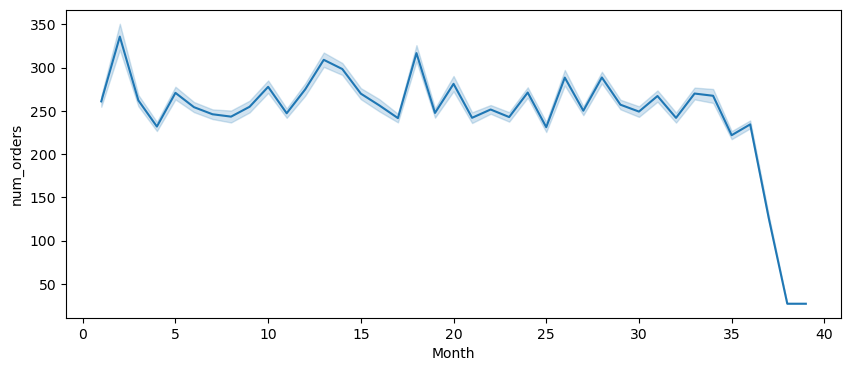

In [77]:
plt.figure(figsize=(10,4))
sns.lineplot(df["Month"],df["num_orders"])

<AxesSubplot:xlabel='Quarter', ylabel='num_orders'>

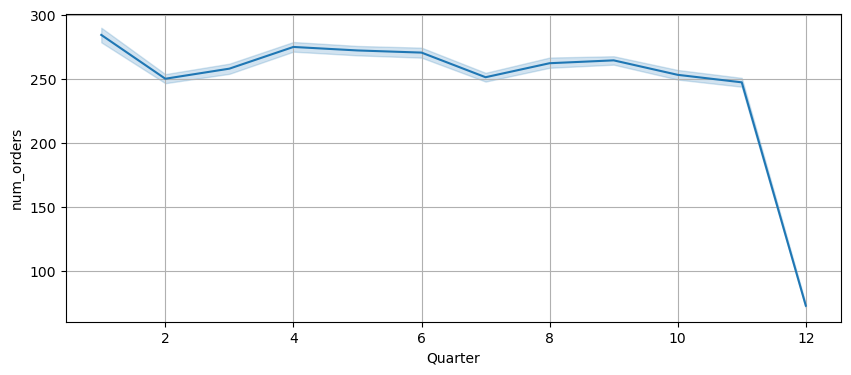

In [78]:
plt.figure(figsize=(10,4))
plt.grid(True)
sns.lineplot(df["Quarter"],df["num_orders"],palette="Set1")

<AxesSubplot:xlabel='Year', ylabel='num_orders'>

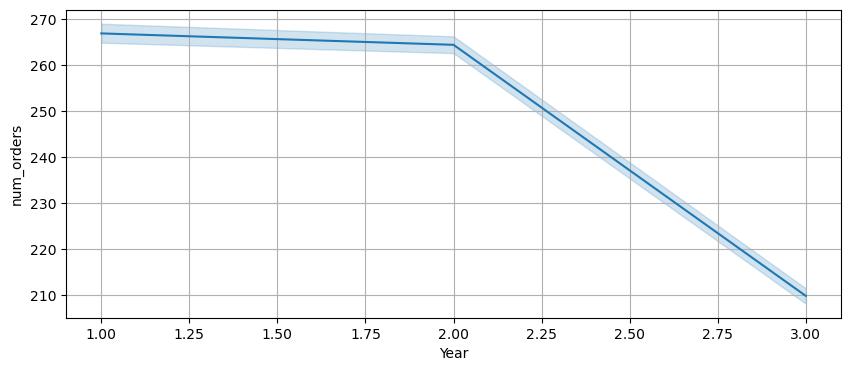

In [79]:
plt.figure(figsize=(10,4))
plt.grid(True)
sns.lineplot(df["Year"],df["num_orders"],palette="Set1")

# Stem Plot

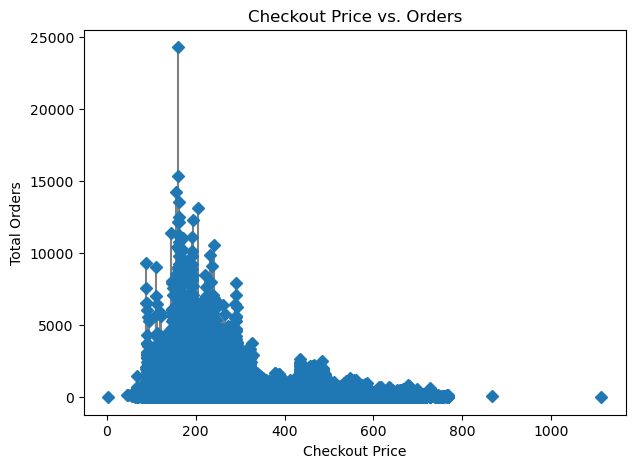

In [80]:
# Distribution of Checkout Price
plt.figure(figsize=(7, 5))
plt.stem(df['checkout_price'], df['num_orders'], linefmt='grey', markerfmt='D', basefmt=" ")
plt.title('Checkout Price vs. Orders')
plt.xlabel('Checkout Price')
plt.ylabel('Total Orders')
plt.show()

# Scatter Plot

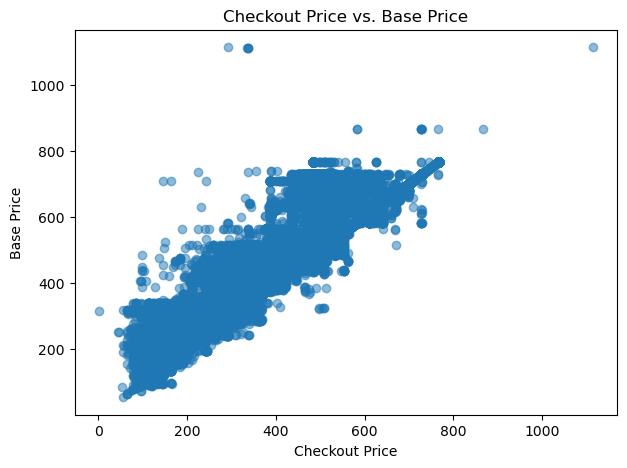

In [81]:
# Analyzing the relationship between checkout price and base price
plt.figure(figsize=(7, 5))
plt.scatter(df['checkout_price'], df['base_price'], alpha=0.5)
plt.title('Checkout Price vs. Base Price')
plt.xlabel('Checkout Price')
plt.ylabel('Base Price')
plt.show()

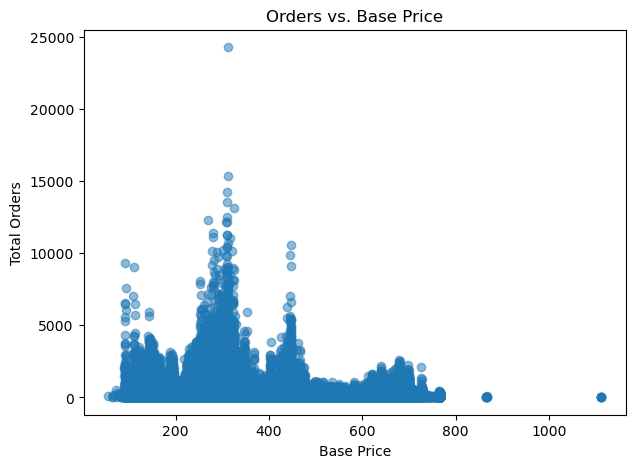

In [82]:
# Orders vs. Base Price
plt.figure(figsize=(7, 5))
plt.scatter(df['base_price'], df['num_orders'], alpha=0.5)
plt.title('Orders vs. Base Price')
plt.xlabel('Base Price')
plt.ylabel('Total Orders')
plt.show()

# Violin Plot

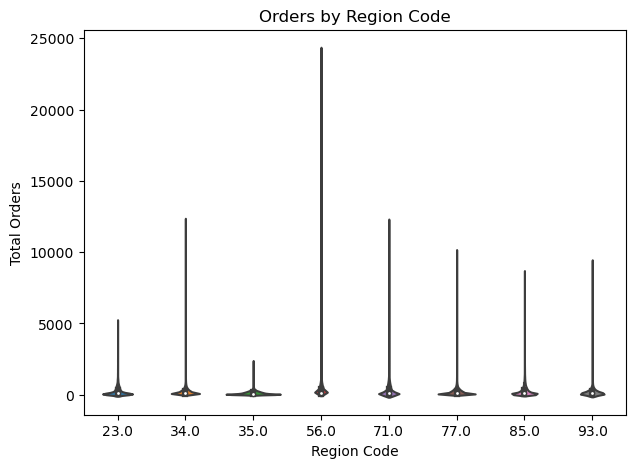

In [83]:
# Orders by Region Code
plt.figure(figsize=(7, 5))
sns.violinplot(x='region_code', y='num_orders', data=df)
plt.title('Orders by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Total Orders')
plt.show()

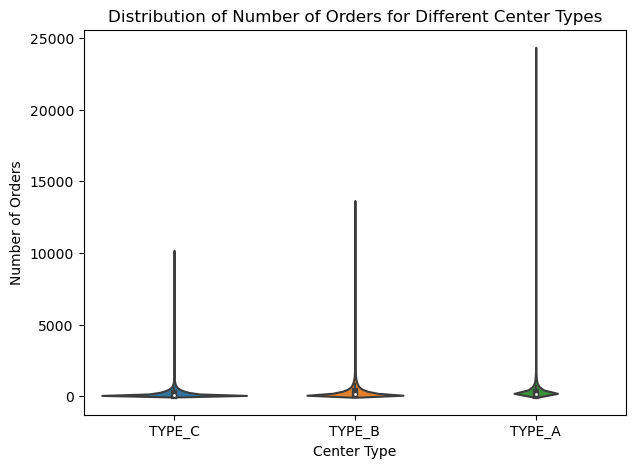

In [84]:
# Visualizing the distribution of num_orders for different center types
plt.figure(figsize=(7, 5))
sns.violinplot(x='center_type', y='num_orders', data=df)
plt.title('Distribution of Number of Orders for Different Center Types')
plt.xlabel('Center Type')
plt.ylabel('Number of Orders')
plt.show()

In [85]:
# Week wise analysis based on month
from IPython.html import widgets
from IPython.display import display
from ipywidgets import widgets, interactive
month = widgets.Dropdown(
    options = ['All'] + list(df['Month'].unique()),
    value = 'All',
    description = 'Month:',
)
def plot(month):
    
    if month == "All":
        plt.figure(figsize = (10,4))
        sns.lineplot(df["week"],df["num_orders"],hue = df["Month"],palette = "Set1")
    else:
        p = data[df["Month"] == month]
        plt.figure(figsize = (10,4))
        sns.lineplot(p["week"],p["num_orders"],color = "green",label = "Month"+str(month))
interactive(plot,month = month)

interactive(children=(Dropdown(description='Month:', options=('All', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

In [86]:
# Month wise analysis based on year
year = widgets.Dropdown(
    options = ['All'] + list(df['Year'].unique()),
    value = 'All',
    description = 'Year:',
)
def plot(year):
    if year == "All":
        plt.figure(figsize=(10,4))
        plt.grid(True)
        sns.lineplot(df["Month"],df["num_orders"],hue = df["Year"],style = df["Year"],palette = "Set1")
    else:
        p=df[df["Year"] == year]
        plt.figure(figsize = (10,4))
        sns.lineplot(p["Month"],p["num_orders"],color = "green",label = "Year"+str(year))
interactive(plot,year=year)

interactive(children=(Dropdown(description='Year:', options=('All', 1, 2, 3), value='All'), Output()), _dom_cl…

In [87]:
df['center_type'] = df['center_type'].map({'TYPE_A': 0, 'TYPE_B': 1, 'TYPE_C': 2}) 
                                                                    
df.head()

week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code  ...  op_area   category cuisine Month  Year  Quarter    C  \
0         56.0  ...      2.0  Beverages    Thai     1     1        1  1.0   
1         56.0  ...      2.0  Beverages    Thai     1     1        1  1.0   
2         56.0  ...      2.0  Beverages    Thai     1     1        1  1.0   
3         56.0  ...      2.0  Beverages    Thai     2     1        1  2.0   
4         56.0  ...      2.0  Beverages    Thai     2     1        1  1.0   

      ratio  Category_check  Category_base  
0  0.898483             1.0            0.0  
1  0.891917             1.0            0.0  
2  0.992533             1.0            0.0  
3  1.007415             1.0            0.0  
4  0.993220             1.0            0.0  

[5 rows x 21 columns]

In [88]:
df['category'] = df['category'].map({'Beverages': 0,'Rice Bowl': 1, 'Sandwich': 2,'Pizza': 3, 
                                     'Starters': 4, 'Other Snacks': 5, 'Desert': 6,'Salad': 7, 
                                     'Pasta': 8, 'Seafood': 9,'Biryani': 10, 'Extras': 11, 
                                     'Soup': 12, 'Fish': 13})
df.head()

week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code  ...  op_area  category  cuisine Month  Year  Quarter    C  \
0         56.0  ...      2.0         0     Thai     1     1        1  1.0   
1         56.0  ...      2.0         0     Thai     1     1        1  1.0   
2         56.0  ...      2.0         0     Thai     1     1        1  1.0   
3         56.0  ...      2.0         0     Thai     2     1        1  2.0   
4         56.0  ...      2.0         0     Thai     2     1        1  1.0   

      ratio  Category_check  Category_base  
0  0.898483             1.0            0.0  
1  0.891917             1.0            0.0  
2  0.992533             1.0            0.0  
3  1.007415             1.0            0.0  
4  0.993220             1.0            0.0  

[5 rows x 21 columns]

In [89]:
df['cuisine'] = df['cuisine'].map({'Italian': 0, 'Thai': 1, 'Indian': 2, 'Continental': 3})
df.head()

week  center_id  meal_id  checkout_price  base_price  \
0   1.0       55.0   1885.0          136.83      152.29   
1   2.0       55.0   1885.0          135.83      152.29   
2   3.0       55.0   1885.0          132.92      133.92   
3   4.0       55.0   1885.0          135.86      134.86   
4   5.0       55.0   1885.0          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                    0.0                0.0       177.0      647.0   
1                    0.0                0.0       323.0      647.0   
2                    0.0                0.0        96.0      647.0   
3                    0.0                0.0       163.0      647.0   
4                    0.0                0.0       215.0      647.0   

   region_code  ...  op_area  category  cuisine  Month  Year  Quarter    C  \
0         56.0  ...      2.0         0        1      1     1        1  1.0   
1         56.0  ...      2.0         0        1      1     1        1  1.0   
2         56.0  ...      2.0         0        1      1     1        1  1.0   
3         56.0  ...      2.0         0        1      2     1        1  2.0   
4         56.0  ...      2.0         0        1      2     1        1  1.0   

      ratio  Category_check  Category_base  
0  0.898483             1.0            0.0  
1  0.891917             1.0            0.0  
2  0.992533             1.0            0.0  
3  1.007415             1.0            0.0  
4  0.993220             1.0            0.0  

[5 rows x 21 columns]

# Train and Test

In [90]:
X = df[['week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 
        'emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code', 
        'center_type', 'op_area', 'category', 'cuisine']]
y = df['num_orders']

In [91]:
# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Linear Regression

In [92]:
# Create and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
lr_predictions = lr.predict(X_test)

# Model evaluation
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R-squared: {lr_r2}')

Linear Regression MSE: 109550.24228869884
Linear Regression R-squared: 0.24957884528787444


# Decision Tree

In [93]:
# Create and fit the model
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

# Make predictions
dt_predictions = dt.predict(X_test)

# Model evaluation
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree MSE: {dt_mse}')
print(f'Decision Tree R-squared: {dt_r2}')

Decision Tree MSE: 37483.76119570772
Decision Tree R-squared: 0.7432355531874686


# Random Forest

In [94]:
# Create and fit the model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# Make predictions
rf_predictions = rf.predict(X_test)

# Model evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest MSE: 19261.39138506387
Random Forest R-squared: 0.8680591182404632


# Gradient Boosting Machines (GBM)

In [95]:
# Create and fit the model
gbm = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
gbm.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm.predict(X_test)

# Model evaluation
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

print(f'Gradient Boosting Machines MSE: {gbm_mse}')
print(f'Gradient Boosting Machines R-squared: {gbm_r2}')

Gradient Boosting Machines MSE: 55646.964391739944
Gradient Boosting Machines R-squared: 0.6188172805220548


# XGBoost

In [96]:
# Create and fit the model
xgb_model = xgb.XGBRegressor(n_estimators = 100, random_state = 42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Model evaluation
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'XGBoost MSE: {xgb_mse}')
print(f'XGBoost R-squared: {xgb_r2}')

XGBoost MSE: 22719.663021533095
XGBoost R-squared: 0.8443698945515883
